# Term Project

## 📌  Subject 1 : 타이타닉(titanic)호 승객 데이터 처리 분석

In [1]:
try:
    from utils import *
except ModuleNotFoundError:
    !wget https://raw.githubusercontent.com/dglee6257/Dataprocessing/main/utils.py -O ./utils.py
    from utils import *

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the titanic dataset
titanic = sns.load_dataset('titanic')
titanic

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

#### 📌  타이타닉 데이터셋 features
- `PassengerId`: A numerical identifier for each passenger.
- `Survived`: Indicates if a passenger survived or not (1 = Yes, 0 = No).
- `Pclass`: Passenger class, a proxy for socio-economic status (1 = 1st, 2 = 2nd, 3 = 3rd).
- `Name`: The name of the passenger.
- `Sex`: The passenger's gender.
- `Age`: The passenger's age in years.
- `SibSp`: The number of siblings or spouses the passenger had aboard the Titanic.
- `Parch`: The number of parents or children the passenger had aboard the Titanic.
- `Ticket`: The ticket number.
- `Fare`: The amount of money spent on their ticket.
- `Cabin`: The cabin number where the passenger stayed.
- `Embarked`: The port where the passenger boarded the Titanic. C = Cherbourg, Q = Queenstown, S = Southampton.

# 1. 결측치 데이터

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


📌  Range Index: 891개 데이터 포인트

In [5]:
# 중복되는 row 제거
titanic.drop_duplicates(inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     784 non-null    int64   
 1   pclass       784 non-null    int64   
 2   sex          784 non-null    object  
 3   age          678 non-null    float64 
 4   sibsp        784 non-null    int64   
 5   parch        784 non-null    int64   
 6   fare         784 non-null    float64 
 7   embarked     782 non-null    object  
 8   class        784 non-null    category
 9   who          784 non-null    object  
 10  adult_male   784 non-null    bool    
 11  deck         202 non-null    category
 12  embark_town  782 non-null    object  
 13  alive        784 non-null    object  
 14  alone        784 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 77.0+ KB


📌  값이 중복되는 행(row)을 제거 후 Range Index: 784개 데이터 포인트    
📌  `age`(float64), `embarked`(str), `deck`(str)에서 결측치 데이터 있음을 확인

In [6]:
titanic.embarked.value_counts(), titanic.age.mean(), titanic.age.median()

(embarked
 S    568
 C    155
 Q     59
 Name: count, dtype: int64,
 29.869351032448375,
 28.25)

In [7]:
# age 결측치 평균값으로 대체, embarked 결측치 S로 대체, deck, embark_town column 삭제
titanic['age'].fillna(int(titanic['age'].mean()), inplace=True)
titanic['embarked'].fillna('S', inplace=True)
df = titanic.drop(['deck', 'embark_town'], axis=1).copy()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    784 non-null    int64   
 1   pclass      784 non-null    int64   
 2   sex         784 non-null    object  
 3   age         784 non-null    float64 
 4   sibsp       784 non-null    int64   
 5   parch       784 non-null    int64   
 6   fare        784 non-null    float64 
 7   embarked    784 non-null    object  
 8   class       784 non-null    category
 9   who         784 non-null    object  
 10  adult_male  784 non-null    bool    
 11  alive       784 non-null    object  
 12  alone       784 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 69.8+ KB


In [8]:
df

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0           0       3    male  22.0      1      0   7.2500        S  Third   
1           1       1  female  38.0      1      0  71.2833        C  First   
2           1       3  female  26.0      0      0   7.9250        S  Third   
3           1       1  female  35.0      1      0  53.1000        S  First   
4           0       3    male  35.0      0      0   8.0500        S  Third   
..        ...     ...     ...   ...    ...    ...      ...      ...    ...   
885         0       3  female  39.0      0      5  29.1250        Q  Third   
887         1       1  female  19.0      0      0  30.0000        S  First   
888         0       3  female  29.0      1      2  23.4500        S  Third   
889         1       1    male  26.0      0      0  30.0000        C  First   
890         0       3    male  32.0      0      0   7.7500        Q  Third   

       who  adult_male alive  alone  
0      man        True    no  False  
1    woman       False   yes  False  
2    woman       False   yes   True  
3    woman       False   yes  False  
4      man        True    no   True  
..     ...         ...   ...    ...  
885  woman       False    no  False  
887  woman       False   yes   True  
888  woman       False    no  False  
889    man        True   yes   True  
890    man        True    no   True  

[784 rows x 13 columns]

In [9]:
# 수치형 데이터와 범주형 데이터 구분
num_columns = list(df.select_dtypes(include=[np.number]).columns)
cat_columns = list(df.select_dtypes(exclude=[np.number]).columns)

In [10]:
num_columns, cat_columns

(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'],
 ['sex', 'embarked', 'class', 'who', 'adult_male', 'alive', 'alone'])

### 2. 레이블 값 확인 (그래프 및 수치)

In [11]:
# 수치 데이터의 통계치 확인
df[num_columns].describe().T

count       mean        std   min    25%   50%       75%       max
survived  784.0   0.411990   0.492507  0.00   0.00   0.0   1.00000    1.0000
pclass    784.0   2.243622   0.855056  1.00   1.00   3.0   3.00000    3.0000
age       784.0  29.751811  13.726968  0.42  22.00  29.0  36.00000   80.0000
sibsp     784.0   0.522959   0.986231  0.00   0.00   0.0   1.00000    8.0000
parch     784.0   0.415816   0.836922  0.00   0.00   0.0   1.00000    6.0000
fare      784.0  34.711740  52.160151  0.00   8.05  15.9  34.10935  512.3292

In [12]:
# 범주형 데이터의 통계치 확인
df[cat_columns].describe().T

count unique    top freq
sex          784      2   male  491
embarked     784      3      S  570
class        784      3  Third  405
who          784      3    man  451
adult_male   784      2   True  451
alive        784      2     no  461
alone        784      2   True  446

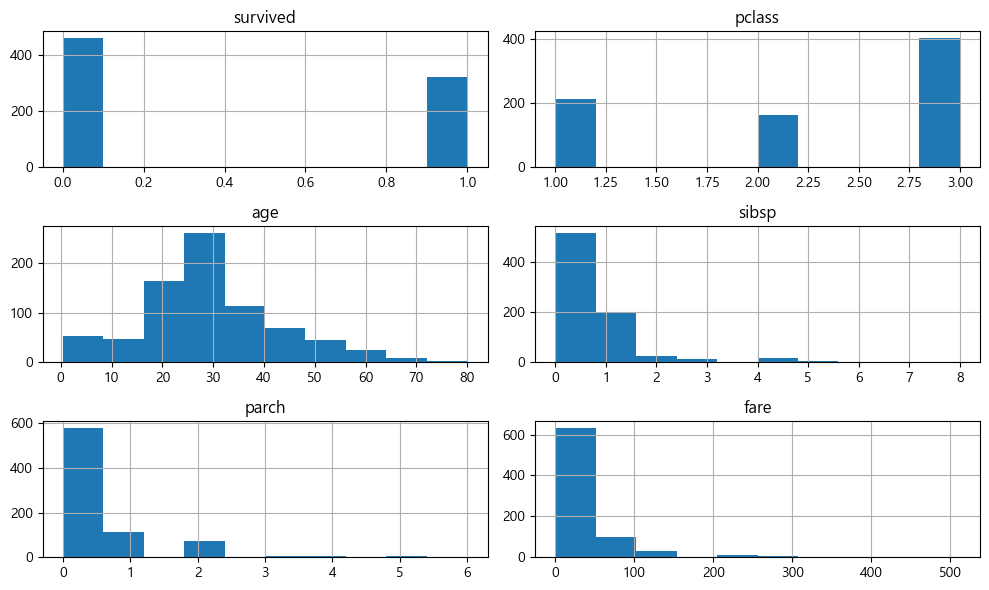

In [13]:
# 수치형 데이터의 분포 확인
df.select_dtypes(include=[np.number]).hist(figsize=(10, 6))
plt.tight_layout();

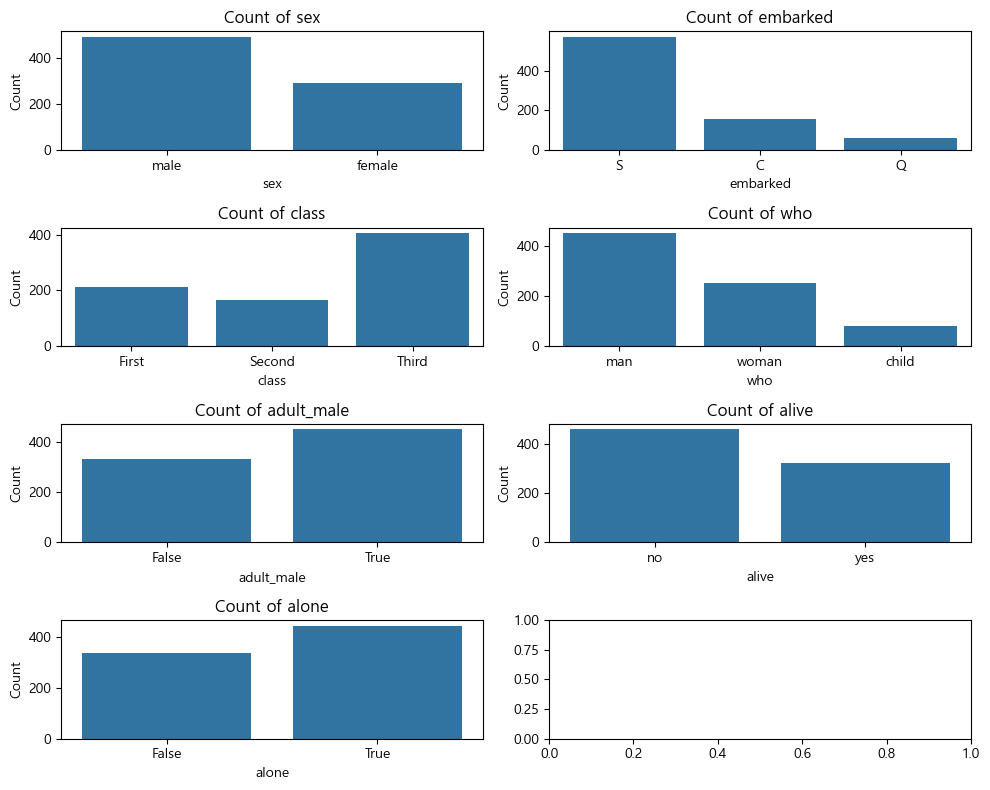

In [14]:
# 범주형 데이터의 분포 확인
from math import ceil


fig, ax = plt.subplots(ceil(len(cat_columns) / 2), 2, figsize=(10, 8))
ax = ax.flatten()
for i, col_val in enumerate(cat_columns):
    sns.countplot(x=col_val, data=df, ax=ax[i])
    ax[i].set_title(f"Count of {col_val}", fontsize=12)
    ax[i].set_xlabel(col_val, fontsize=10)
    ax[i].set_ylabel("Count", fontsize=10)
    plt.tight_layout()

### 3.feature 등의 상관관계 (feature간 feature와 label간)
- heatmap, pairplot

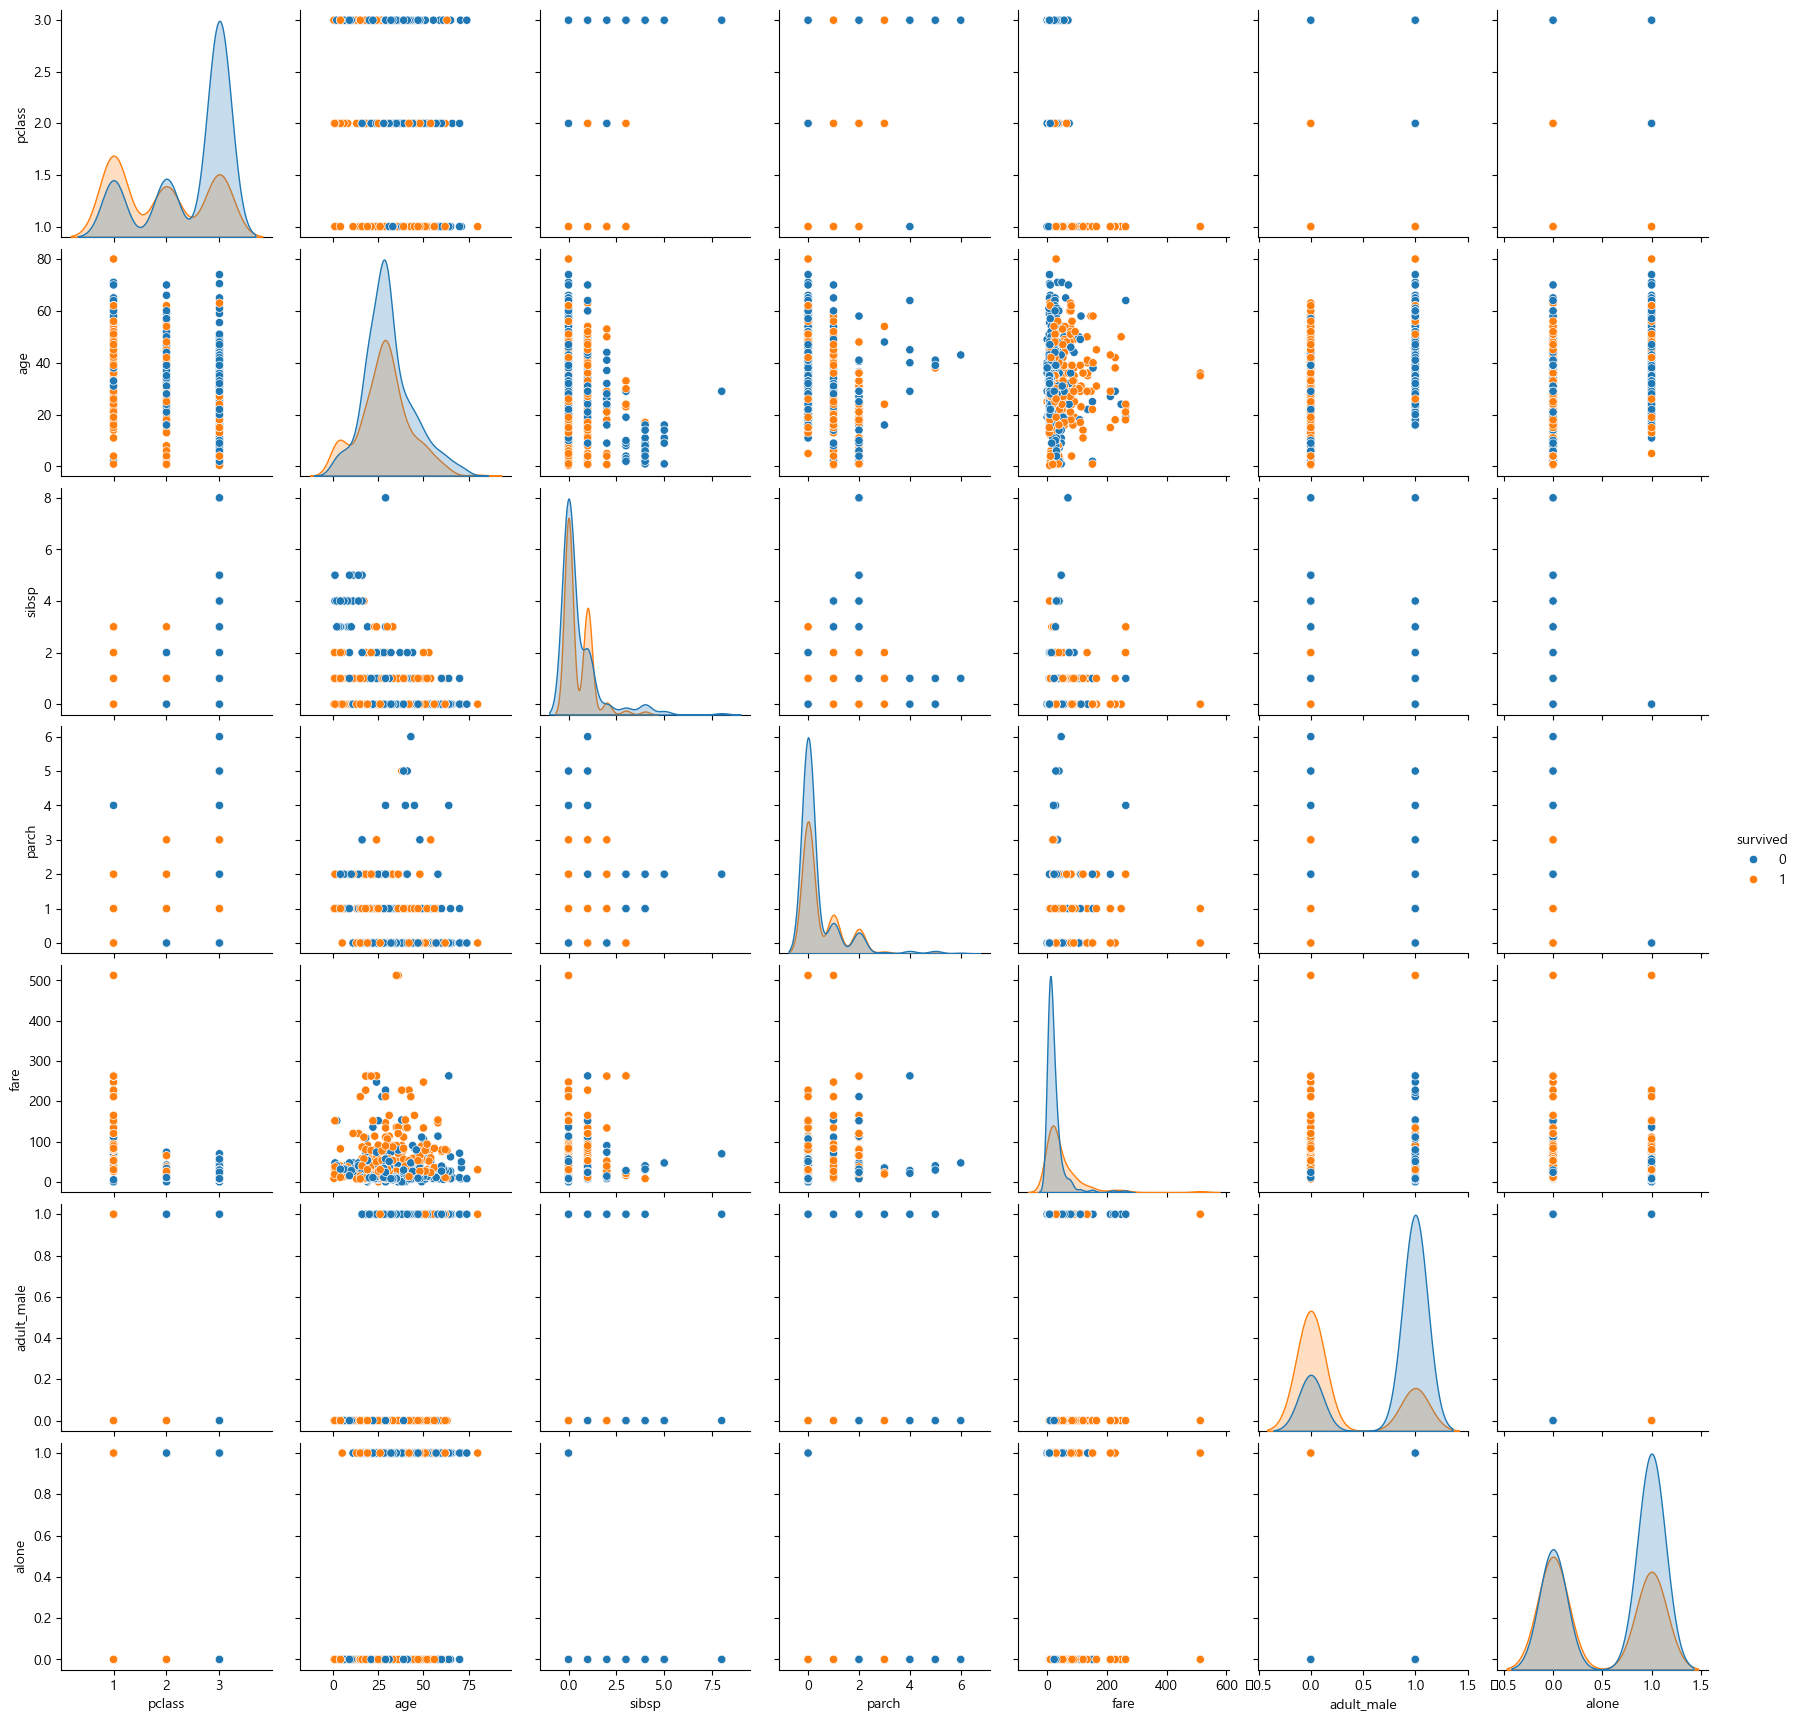

In [15]:
# pairplot
sns.pairplot(df, hue='survived');

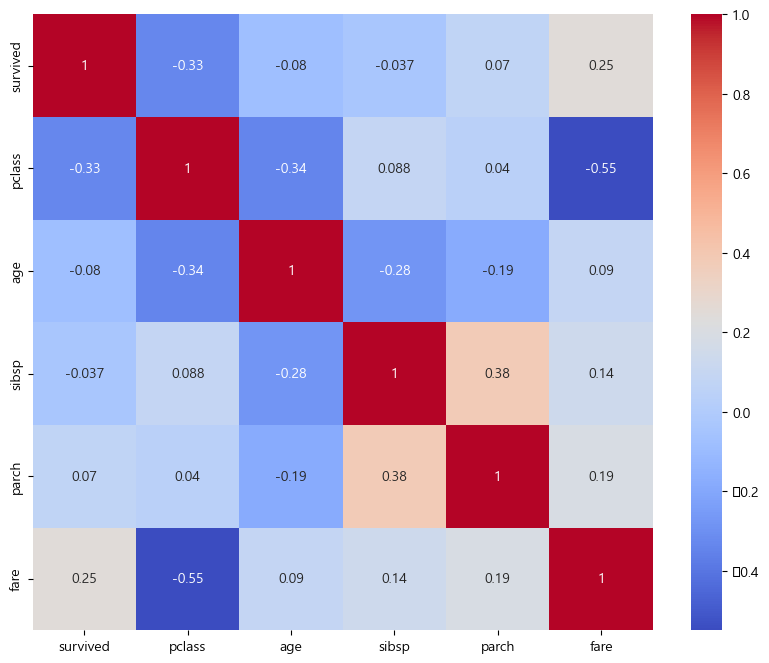

In [16]:
# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_columns].corr(), annot=True, cmap='coolwarm');



### 4. 새로운 데이터 프레임 생성, 그룹별

In [17]:
y_column = 'survived'
num_columns = ['age', 'fare']
cat_columns = ['pclass', 'sibsp', 'parch'] + list(df.select_dtypes(exclude=[np.number]).columns)
y_column, num_columns, cat_columns

('survived',
 ['age', 'fare'],
 ['pclass',
  'sibsp',
  'parch',
  'sex',
  'embarked',
  'class',
  'who',
  'adult_male',
  'alive',
  'alone'])

In [18]:
# 수치형 데이터 전처리
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[num_columns])
scaled_df = pd.DataFrame(scaled_df, columns=num_columns)
scaled_df

age      fare
0   -0.565075 -0.526825
1    0.601258  0.701587
2   -0.273491 -0.513876
3    0.382571  0.352760
4    0.382571 -0.511478
..        ...       ...
779  0.674154 -0.107176
780 -0.783762 -0.090390
781 -0.054804 -0.216045
782 -0.273491 -0.090390
783  0.163884 -0.517233

[784 rows x 2 columns]

In [19]:
# 범주형 데이터 전처리
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(df[cat_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_columns))

encoded_df


pclass_1  pclass_2  pclass_3  sibsp_0  sibsp_1  sibsp_2  sibsp_3  \
0         0.0       0.0       1.0      0.0      1.0      0.0      0.0   
1         1.0       0.0       0.0      0.0      1.0      0.0      0.0   
2         0.0       0.0       1.0      1.0      0.0      0.0      0.0   
3         1.0       0.0       0.0      0.0      1.0      0.0      0.0   
4         0.0       0.0       1.0      1.0      0.0      0.0      0.0   
..        ...       ...       ...      ...      ...      ...      ...   
779       0.0       0.0       1.0      1.0      0.0      0.0      0.0   
780       1.0       0.0       0.0      1.0      0.0      0.0      0.0   
781       0.0       0.0       1.0      0.0      1.0      0.0      0.0   
782       1.0       0.0       0.0      1.0      0.0      0.0      0.0   
783       0.0       0.0       1.0      1.0      0.0      0.0      0.0   

     sibsp_4  sibsp_5  sibsp_8  ...  class_Third  who_child  who_man  \
0        0.0      0.0      0.0  ...          1.0        0.0      1.0   
1        0.0      0.0      0.0  ...          0.0        0.0      0.0   
2        0.0      0.0      0.0  ...          1.0        0.0      0.0   
3        0.0      0.0      0.0  ...          0.0        0.0      0.0   
4        0.0      0.0      0.0  ...          1.0        0.0      1.0   
..       ...      ...      ...  ...          ...        ...      ...   
779      0.0      0.0      0.0  ...          1.0        0.0      0.0   
780      0.0      0.0      0.0  ...          0.0        0.0      0.0   
781      0.0      0.0      0.0  ...          1.0        0.0      0.0   
782      0.0      0.0      0.0  ...          0.0        0.0      1.0   
783      0.0      0.0      0.0  ...          1.0        0.0      1.0   

     who_woman  adult_male_False  adult_male_True  alive_no  alive_yes  \
0          0.0               0.0              1.0       1.0        0.0   
1          1.0               1.0              0.0       0.0        1.0   
2          1.0               1.0              0.0       0.0        1.0   
3          1.0               1.0              0.0       0.0        1.0   
4          0.0               0.0              1.0       1.0        0.0   
..         ...               ...              ...       ...        ...   
779        1.0               1.0              0.0       1.0        0.0   
780        1.0               1.0              0.0       0.0        1.0   
781        1.0               1.0              0.0       1.0        0.0   
782        0.0               0.0              1.0       0.0        1.0   
783        0.0               0.0              1.0       1.0        0.0   

     alone_False  alone_True  
0            1.0         0.0  
1            1.0         0.0  
2            0.0         1.0  
3            1.0         0.0  
4            0.0         1.0  
..           ...         ...  
779          1.0         0.0  
780          0.0         1.0  
781          1.0         0.0  
782          0.0         1.0  
783          0.0         1.0  

[784 rows x 34 columns]

In [20]:
# 전처리된 데이터와 원본 데이터 결합
merged_df = pd.concat([scaled_df, encoded_df], axis=1)
merged_df

age      fare  pclass_1  pclass_2  pclass_3  sibsp_0  sibsp_1  \
0   -0.565075 -0.526825       0.0       0.0       1.0      0.0      1.0   
1    0.601258  0.701587       1.0       0.0       0.0      0.0      1.0   
2   -0.273491 -0.513876       0.0       0.0       1.0      1.0      0.0   
3    0.382571  0.352760       1.0       0.0       0.0      0.0      1.0   
4    0.382571 -0.511478       0.0       0.0       1.0      1.0      0.0   
..        ...       ...       ...       ...       ...      ...      ...   
779  0.674154 -0.107176       0.0       0.0       1.0      1.0      0.0   
780 -0.783762 -0.090390       1.0       0.0       0.0      1.0      0.0   
781 -0.054804 -0.216045       0.0       0.0       1.0      0.0      1.0   
782 -0.273491 -0.090390       1.0       0.0       0.0      1.0      0.0   
783  0.163884 -0.517233       0.0       0.0       1.0      1.0      0.0   

     sibsp_2  sibsp_3  sibsp_4  ...  class_Third  who_child  who_man  \
0        0.0      0.0      0.0  ...          1.0        0.0      1.0   
1        0.0      0.0      0.0  ...          0.0        0.0      0.0   
2        0.0      0.0      0.0  ...          1.0        0.0      0.0   
3        0.0      0.0      0.0  ...          0.0        0.0      0.0   
4        0.0      0.0      0.0  ...          1.0        0.0      1.0   
..       ...      ...      ...  ...          ...        ...      ...   
779      0.0      0.0      0.0  ...          1.0        0.0      0.0   
780      0.0      0.0      0.0  ...          0.0        0.0      0.0   
781      0.0      0.0      0.0  ...          1.0        0.0      0.0   
782      0.0      0.0      0.0  ...          0.0        0.0      1.0   
783      0.0      0.0      0.0  ...          1.0        0.0      1.0   

     who_woman  adult_male_False  adult_male_True  alive_no  alive_yes  \
0          0.0               0.0              1.0       1.0        0.0   
1          1.0               1.0              0.0       0.0        1.0   
2          1.0               1.0              0.0       0.0        1.0   
3          1.0               1.0              0.0       0.0        1.0   
4          0.0               0.0              1.0       1.0        0.0   
..         ...               ...              ...       ...        ...   
779        1.0               1.0              0.0       1.0        0.0   
780        1.0               1.0              0.0       0.0        1.0   
781        1.0               1.0              0.0       1.0        0.0   
782        0.0               0.0              1.0       0.0        1.0   
783        0.0               0.0              1.0       1.0        0.0   

     alone_False  alone_True  
0            1.0         0.0  
1            1.0         0.0  
2            0.0         1.0  
3            1.0         0.0  
4            0.0         1.0  
..           ...         ...  
779          1.0         0.0  
780          0.0         1.0  
781          1.0         0.0  
782          0.0         1.0  
783          0.0         1.0  

[784 rows x 36 columns]

### 생존 예측

In [21]:
X = merged_df.values
y = df[y_column].values
X.shape, type(X), y.shape, type(y)

((784, 36), numpy.ndarray, (784,), numpy.ndarray)

In [22]:
# splitting the dataset into train set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((627, 36), (157, 36), (627,), (157,))

In [23]:
from sklearn.linear_model import LogisticRegression

# make an instance Logistic Regression model
regressor = LogisticRegression()

print("regressor's initial state:")
init_state = attr(regressor)[2]
init_state

regressor's initial state:


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [24]:
# fit the model with training data
regressor.fit(X_train,y_train)

print("After fit(with training data), regressor's state")
fit_state = attr(regressor)[2]
fit_state

After fit(with training data), regressor's state


{'C': 1.0,
 'class_weight': None,
 'classes_': array([0, 1], dtype=int64),
 'coef_': array([[-0.10182639,  0.05786623,  0.19808627,  0.02990332, -0.22799871,
          0.13785067,  0.08978497,  0.02064419, -0.07870271, -0.0890008 ,
         -0.05987724, -0.0207082 ,  0.05851539,  0.0854672 , -0.08177719,
          0.01125416, -0.03474691, -0.02181259, -0.0169092 ,  0.1770339 ,
         -0.17704302,  0.14204444, -0.04582112, -0.09623245,  0.19808627,
          0.02990332, -0.22799871,  0.05231962, -0.24661607,  0.19428733,
          0.24660695, -0.24661607, -4.0302823 ,  4.03027318, -0.02008431,
          0.02007519]]),
 'dual': False,
 'fit_intercept': True,
 'intercept_': array([-0.06550418]),
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_features_in_': 36,
 'n_iter_': array([30]),
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [25]:
# predict the result
y_pred = regressor.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0], dtype=int64)

In [26]:
y_test

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0], dtype=int64)

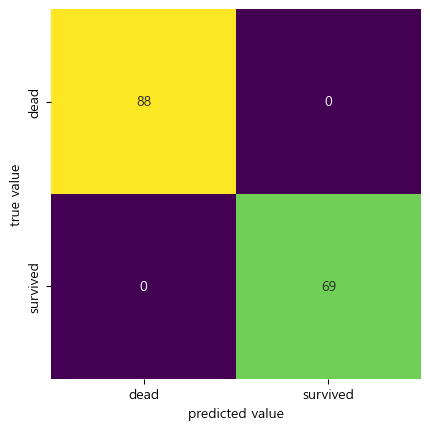

In [27]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)

xticklabels = yticklabels = ['dead', 'survived']
sns.heatmap(
    mat,
    square=True,
    annot=True,
    cbar=False,
    xticklabels=xticklabels,
    yticklabels=yticklabels,
    fmt="d",
    cmap='viridis'
)
plt.xlabel("predicted value")
plt.ylabel("true value");

In [28]:
# accuracy
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print(f"accuracy: {acc:.4f}")

accuracy: 1.0000


## 📌  Subject 2 : 화학성분 데이터에 의한 와인 품질 예측

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

### Check data type and NaN values

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [32]:
columns = list(df.columns)
columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

### Data Collection Methods
- 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'   
    
    분석장비 활용   
![와인분광법](figs\chemical_analysis.jpg)




- quality   
   
   소믈리에   
![quality](https://pds.joongang.co.kr//news/component/htmlphoto_mmdata/201807/06/8b1d494e-ed4f-49cc-a2d1-7a38097adfb1.jpg)



### 🚩 과제 설정
- 와인의 화학성분 분석데이터로부터 와인의 등급을 매기는 작업을 자동화 할 수 있는가?

### Descriptive statistics of the chemical features

In [33]:
df[columns[:-1]].describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol  
count  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983  
std       0.154386     0.169507     1.065668  
min       2.740000     0.330000     8.400000  
25%       3.210000     0.550000     9.500000  
50%       3.310000     0.620000    10.200000  
75%       3.400000     0.730000    11.100000  
max       4.010000     2.000000    14.900000

### Histogram Visualization

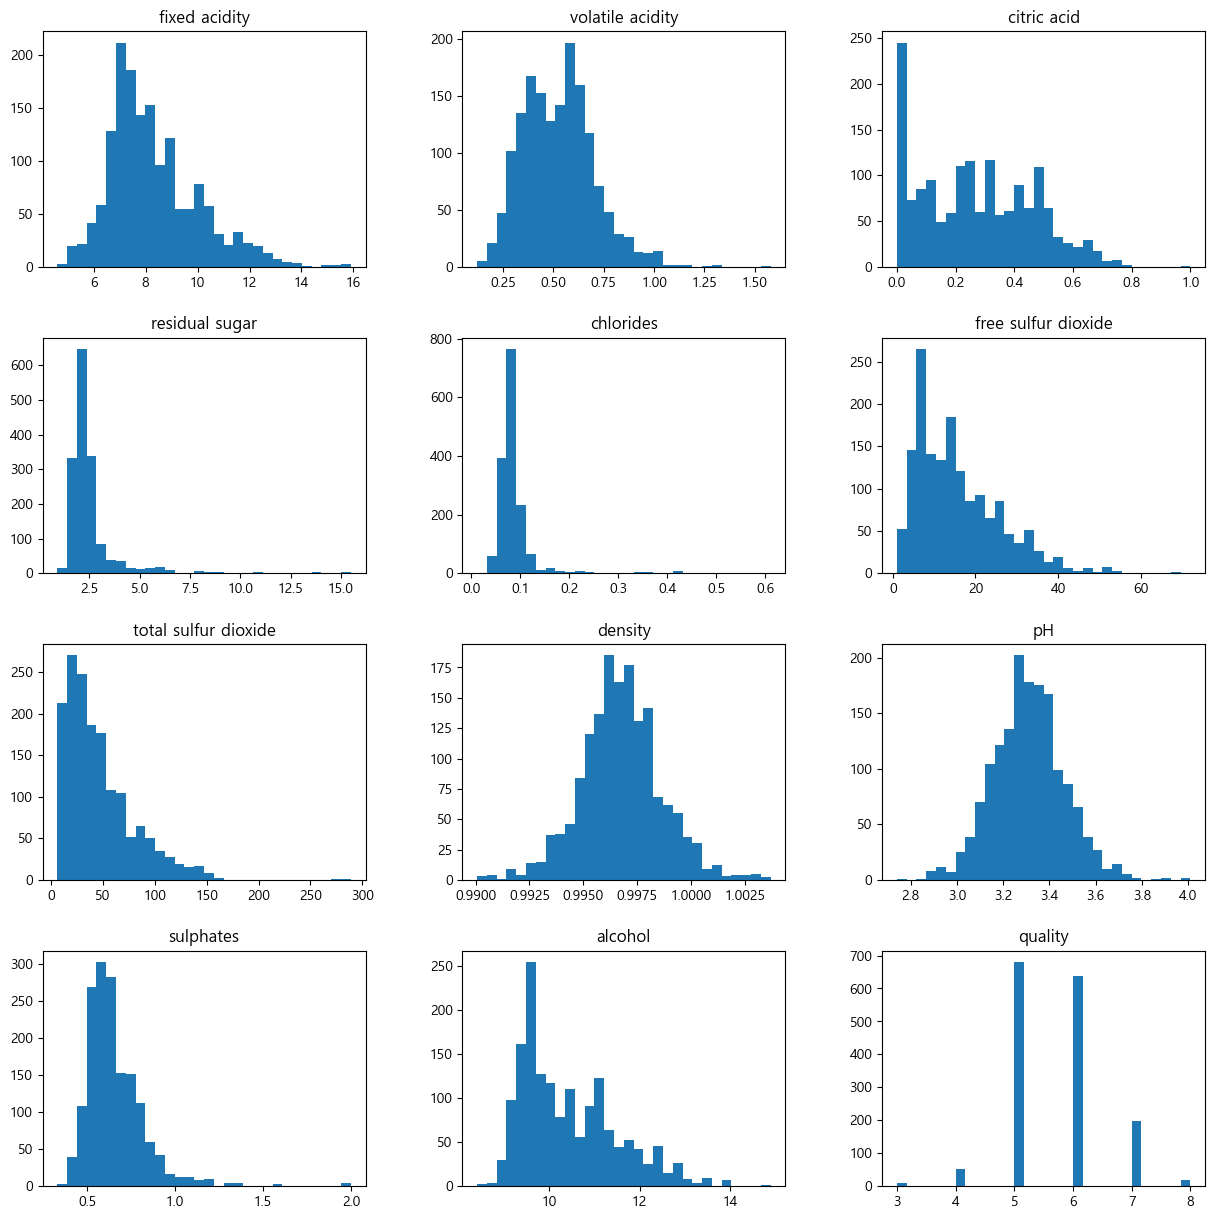

In [34]:
df.hist(bins=30, figsize=(15, 15), grid=False);

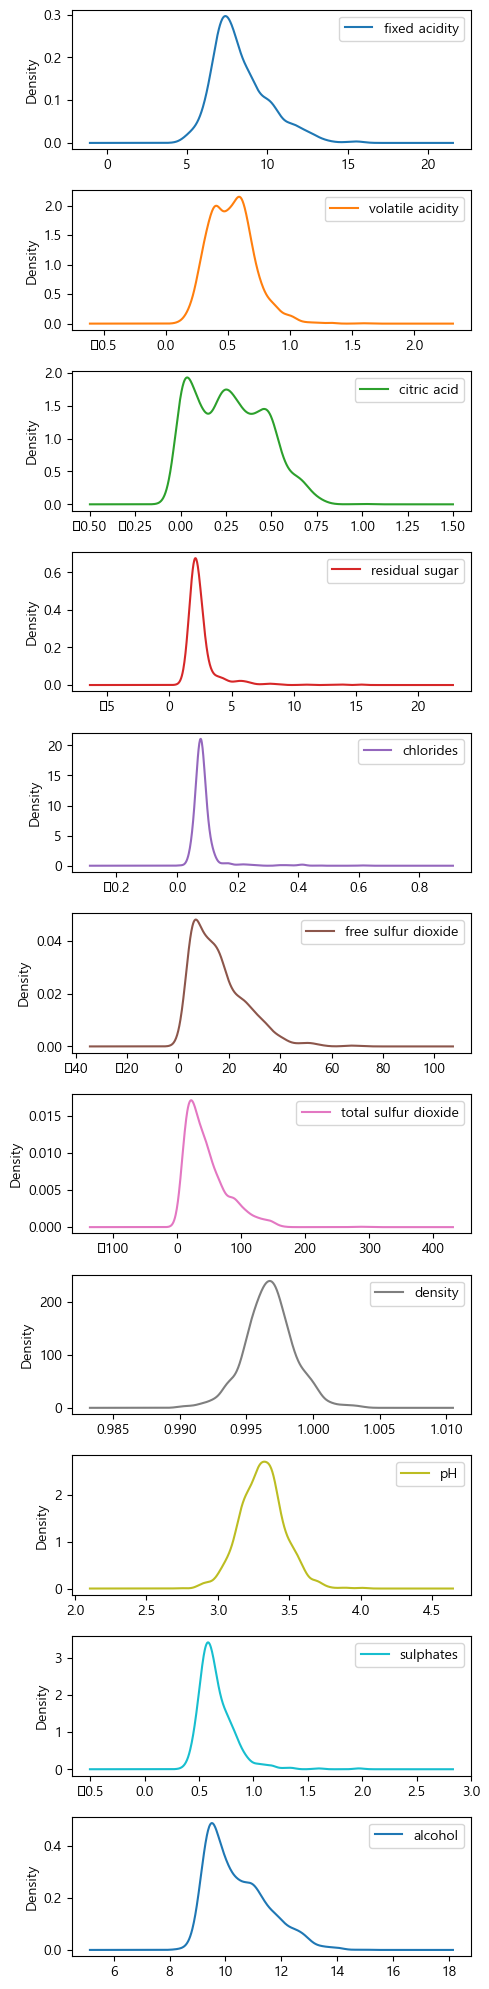

In [35]:
df[columns[:-1]].plot(kind='kde', subplots=True, figsize=(5, 20), sharex=False)
plt.tight_layout();

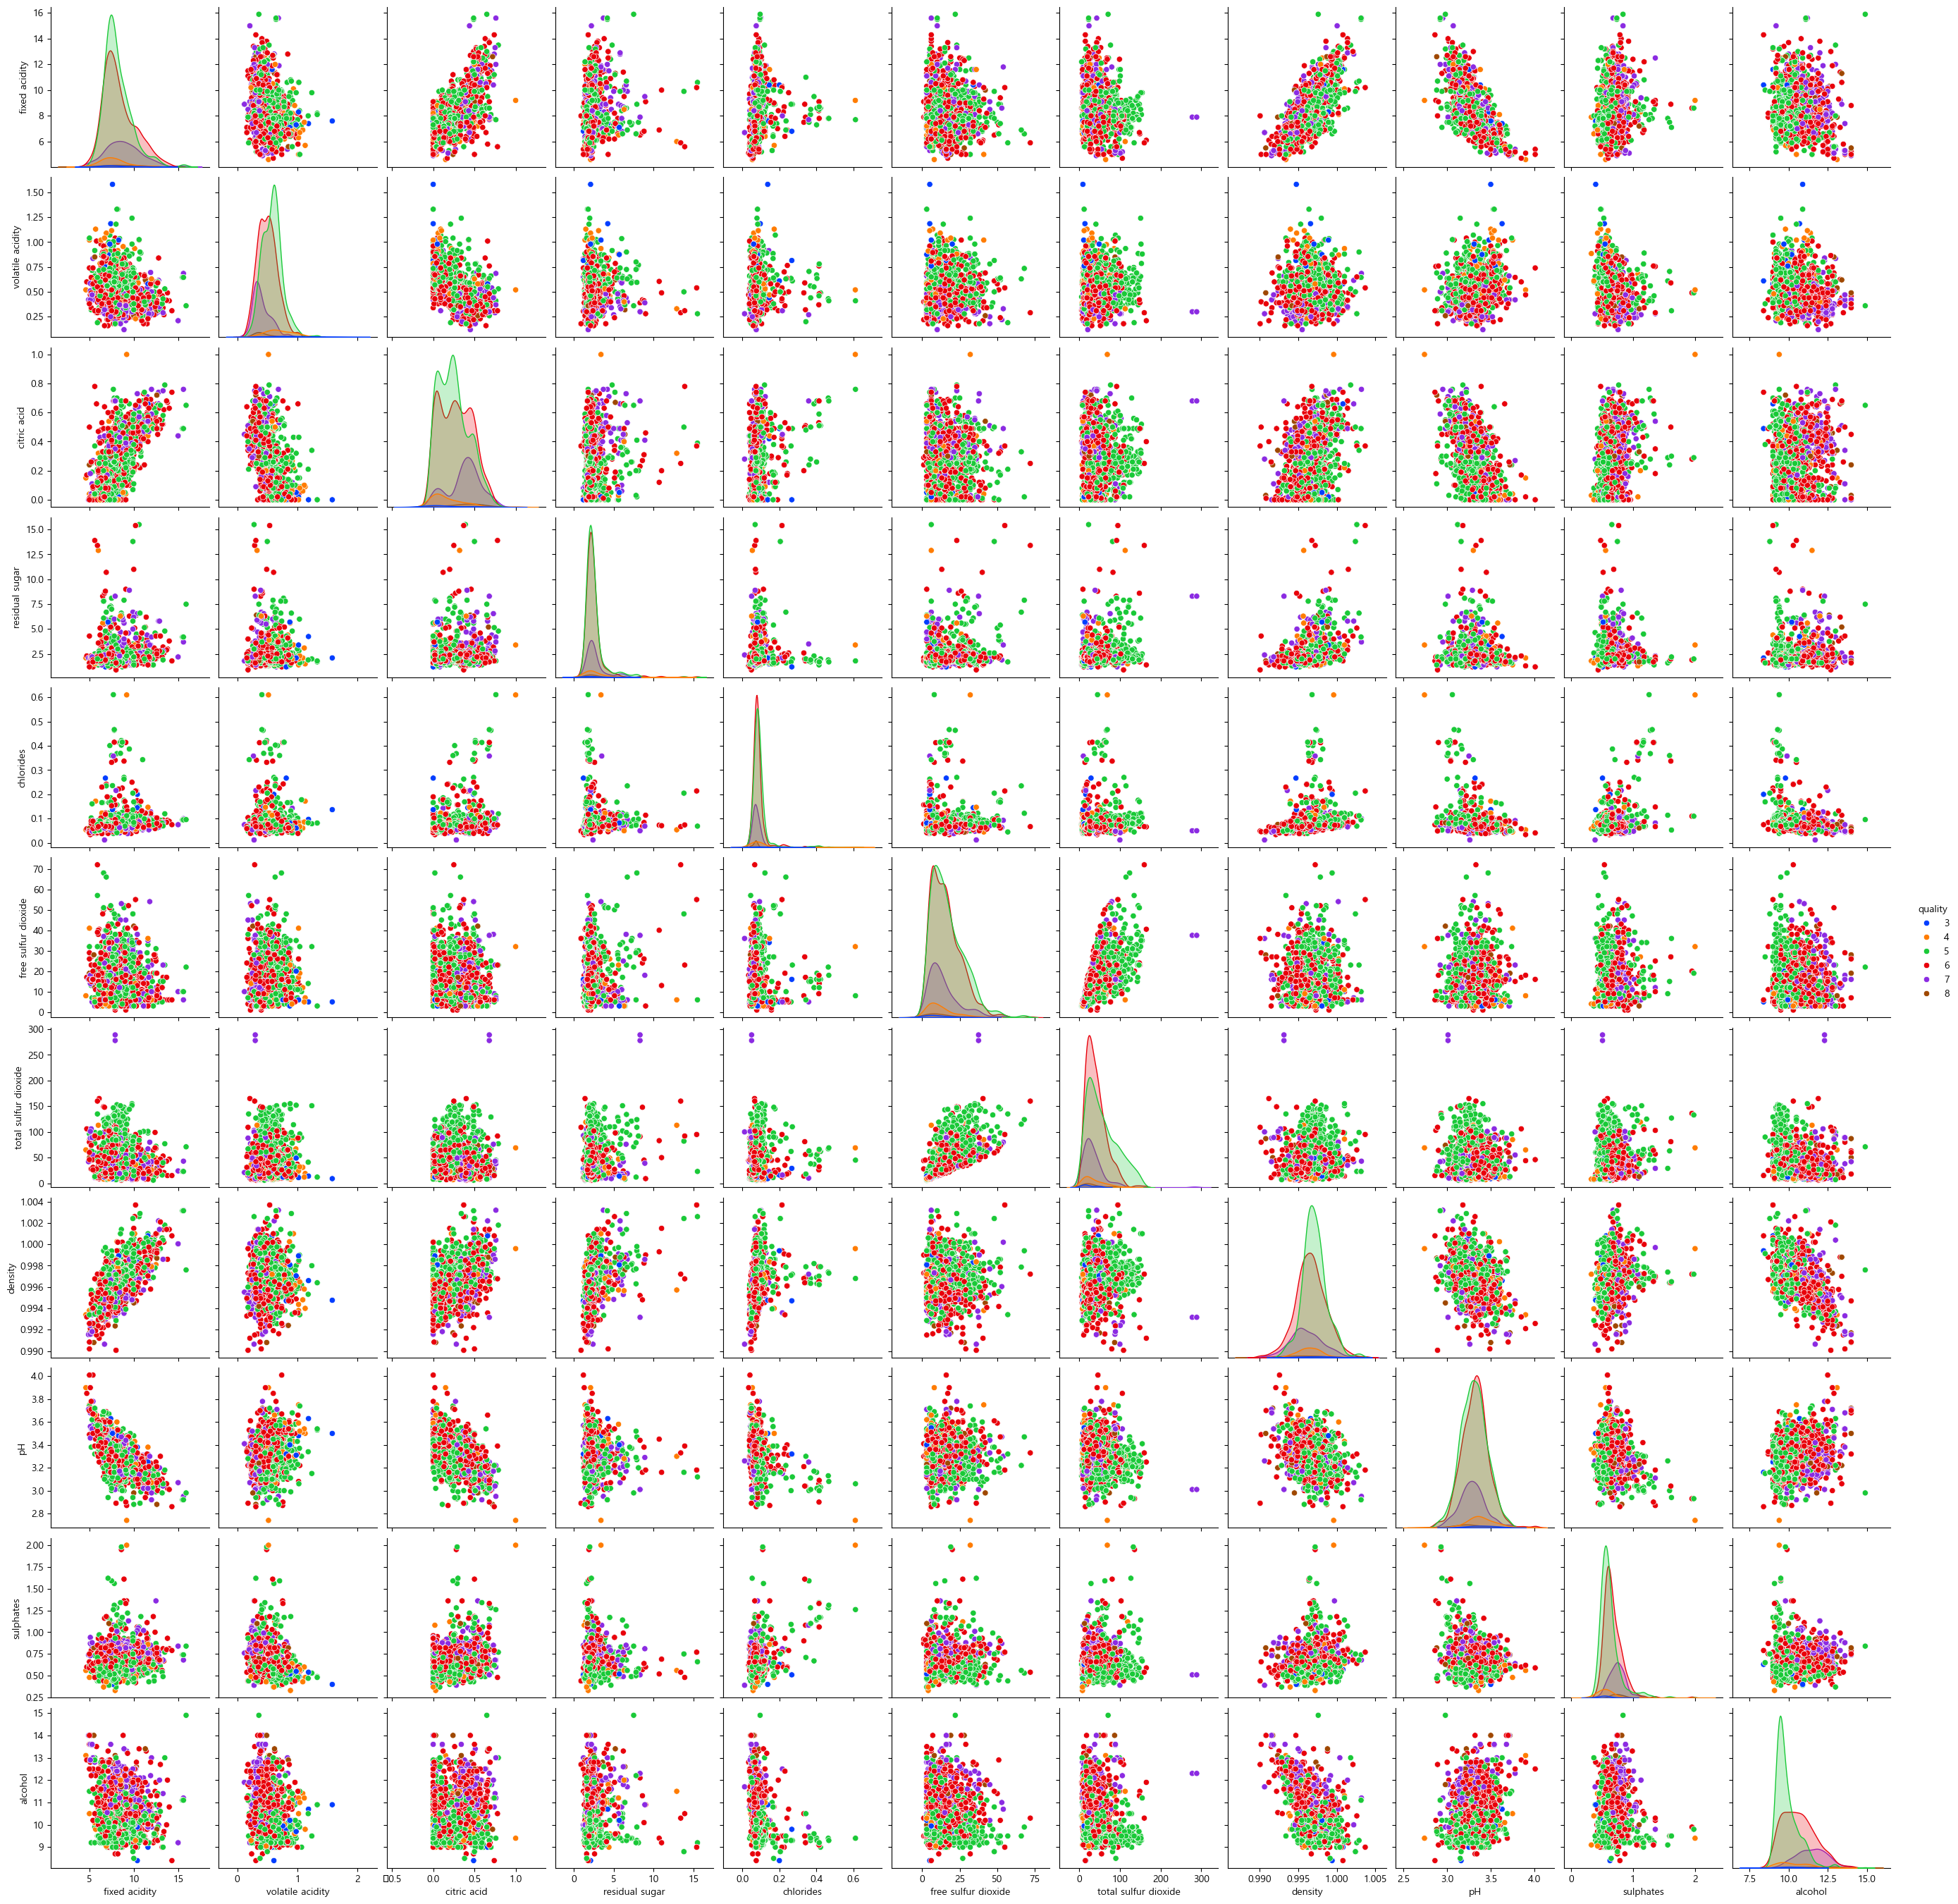

In [36]:
sns.pairplot(df, hue="quality", palette='bright');

### Wine Quality별 데이터 분포

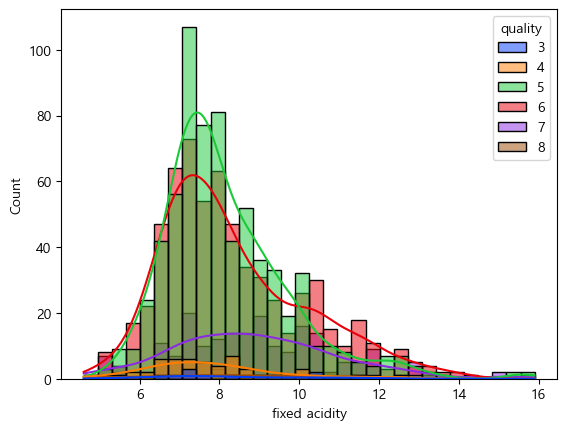

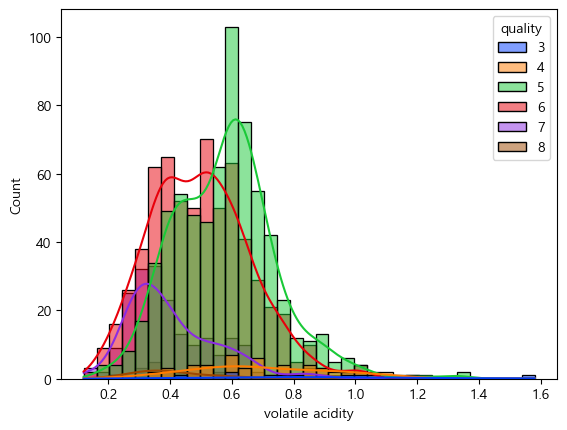

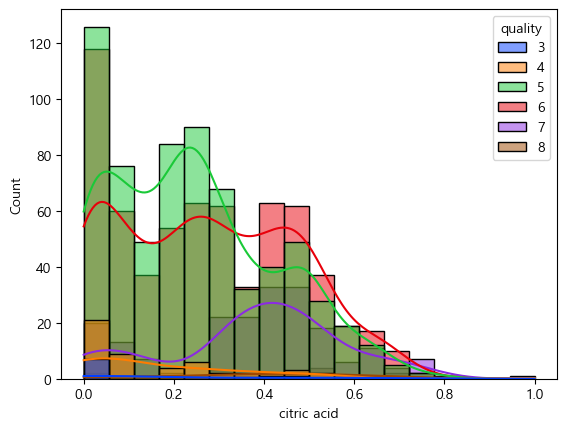

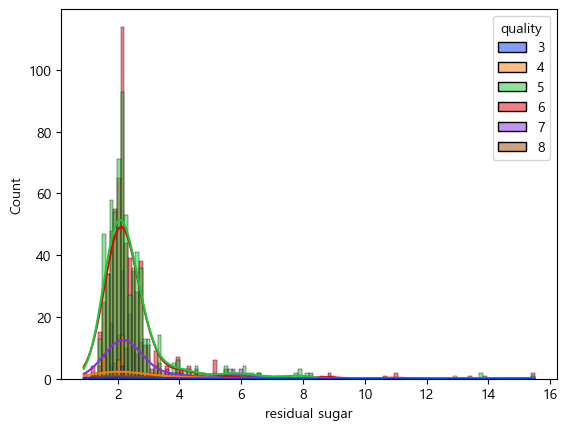

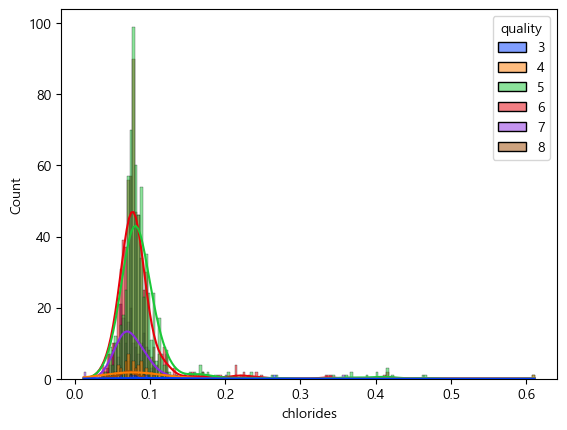

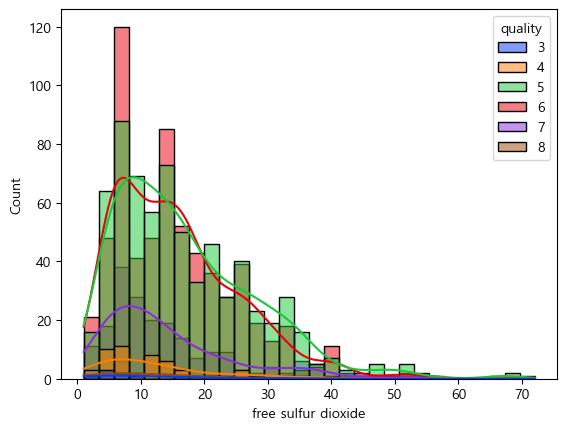

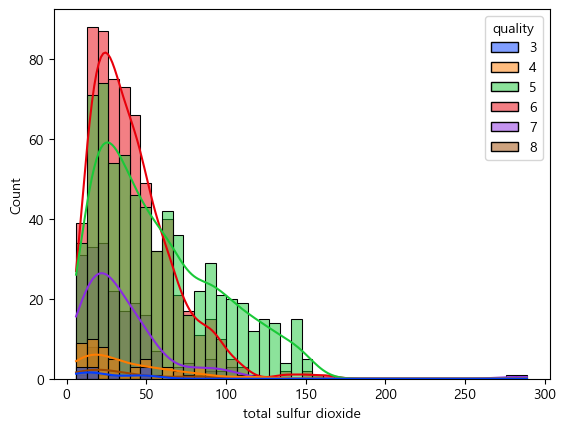

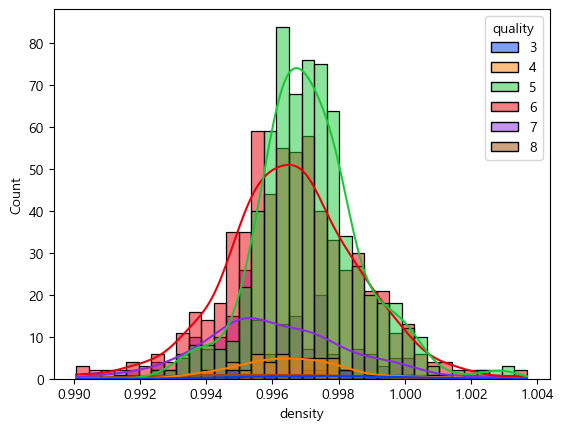

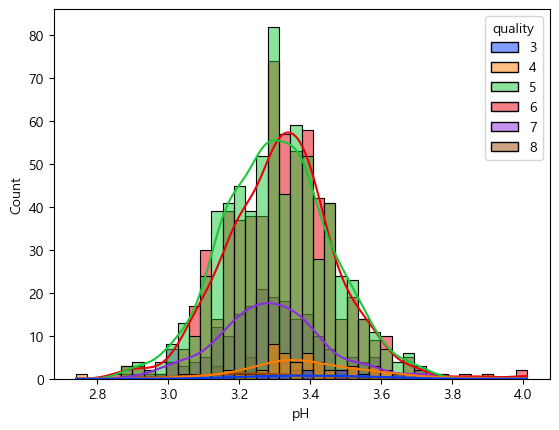

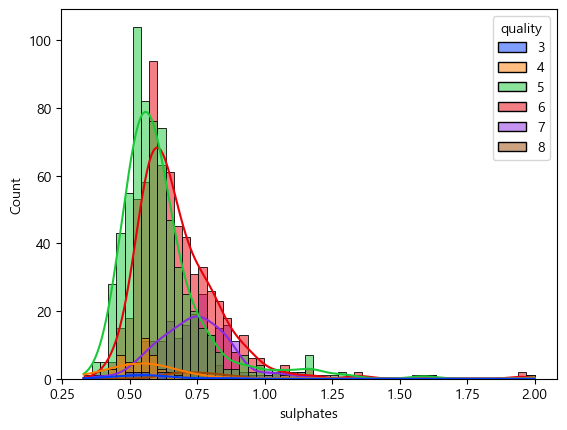

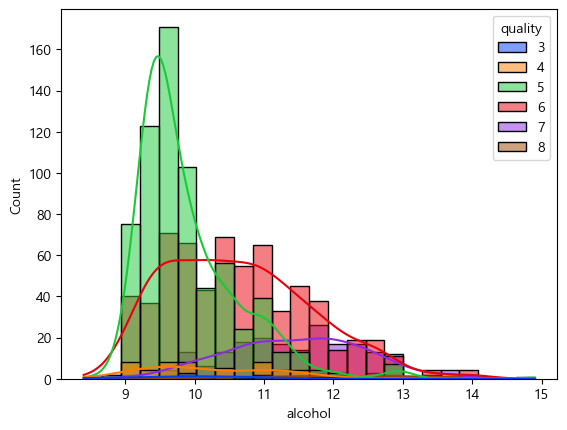

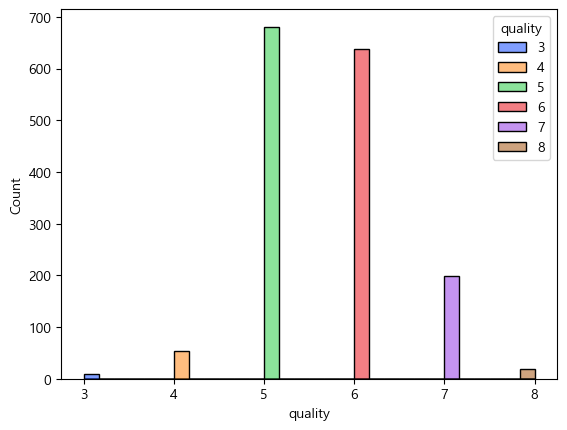

In [37]:
for column in columns:
    plt.figure()
    sns.histplot(df, x=column, hue='quality', palette='bright', kde=True)
    # https://seaborn.pydata.org/generated/seaborn.histplot.html 참조

### Data Preparation for Machine Leaning

In [38]:
X = df[columns[:-1]].values
y = df[columns[-1]].values
X.shape, type(X), y.shape, type(y)

((1599, 11), numpy.ndarray, (1599,), numpy.ndarray)

In [39]:
# splitting the dataset into train set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1199, 11), (400, 11), (1199,), (400,))

### Machine Learning Code using Logistic Regression Model

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
# make an instance Logistic Regression model
regressor = LogisticRegression()

print("regressor's initial state:")
init_state = attr(regressor)[2]
init_state

regressor's initial state:


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [42]:
# fit the model with training data
regressor.fit(X_train,y_train)

print("After fit(with training data), regressor's state")
fit_state = attr(regressor)[2]
fit_state


After fit(with training data), regressor's state


{'C': 1.0,
 'class_weight': None,
 'classes_': array([3, 4, 5, 6, 7, 8], dtype=int64),
 'coef_': array([[ 9.00160782e-02,  1.20932367e-01, -2.16989770e-02,
          7.87003231e-02,  1.34059249e-02,  5.40107352e-02,
         -5.99096736e-02, -1.13375385e-03,  1.46317421e-02,
         -2.77555474e-02, -1.98774918e-01],
        [-1.80445341e-01,  1.76549787e-01, -6.68270305e-02,
          1.54027369e-01,  1.33840657e-02, -4.22544985e-02,
          1.91328672e-02,  2.75114911e-02,  1.43606661e-01,
         -4.37627182e-02, -8.77755397e-03],
        [ 1.36630403e-01,  9.32179563e-01, -5.00740037e-01,
         -8.01900843e-02,  8.88790522e-02, -2.25395774e-02,
          3.39843285e-02,  4.70862001e-01,  1.65264052e+00,
         -3.81607217e-01, -6.30773017e-01],
        [ 2.10101076e-03, -3.57372062e-01,  7.03361462e-02,
         -1.18875121e-01, -2.42696440e-02,  7.51872759e-03,
          1.40272147e-02, -8.39570866e-02, -2.44789835e-01,
          2.23391161e-01,  2.58547251e-01],
        

In [43]:
print(f"New states generated after fit operation")
new_keys = fit_state.keys() - init_state.keys()
new_keys

New states generated after fit operation


{'classes_', 'coef_', 'intercept_', 'n_features_in_', 'n_iter_'}

In [44]:
for key in new_keys:
    print(f"📌 {key}: {fit_state[key]}\n")

📌 coef_: [[ 9.00160782e-02  1.20932367e-01 -2.16989770e-02  7.87003231e-02
   1.34059249e-02  5.40107352e-02 -5.99096736e-02 -1.13375385e-03
   1.46317421e-02 -2.77555474e-02 -1.98774918e-01]
 [-1.80445341e-01  1.76549787e-01 -6.68270305e-02  1.54027369e-01
   1.33840657e-02 -4.22544985e-02  1.91328672e-02  2.75114911e-02
   1.43606661e-01 -4.37627182e-02 -8.77755397e-03]
 [ 1.36630403e-01  9.32179563e-01 -5.00740037e-01 -8.01900843e-02
   8.88790522e-02 -2.25395774e-02  3.39843285e-02  4.70862001e-01
   1.65264052e+00 -3.81607217e-01 -6.30773017e-01]
 [ 2.10101076e-03 -3.57372062e-01  7.03361462e-02 -1.18875121e-01
  -2.42696440e-02  7.51872759e-03  1.40272147e-02 -8.39570866e-02
  -2.44789835e-01  2.23391161e-01  2.58547251e-01]
 [-2.14427320e-02 -7.88225457e-01  4.49950021e-01 -2.52122533e-02
  -7.84686194e-02  1.52315561e-02  2.05715186e-03 -3.54883072e-01
  -1.32823195e+00  2.13081463e-01  5.68163222e-01]
 [-2.68594190e-02 -8.40641983e-02  6.89798773e-02 -8.45023361e-03
  -1.29307

In [45]:
regressor.classes_.shape, regressor.coef_.shape, regressor.intercept_.shape

((6,), (6, 11), (6,))

#### run and check the model performance with test data

In [46]:
# predict the result
y_pred = regressor.predict(X_test)
y_pred

array([5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5,
       6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5,
       6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6,
       6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6,
       6, 5, 5, 5, 5, 6, 5, 7, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5,
       5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 6, 6, 5, 6, 5, 7, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 7,
       6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6,
       5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5,

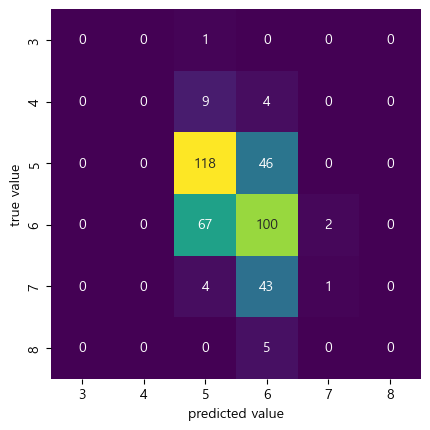

In [47]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)

xticklabels = yticklabels = [3, 4, 5, 6, 7, 8]
sns.heatmap(
    mat,
    square=True,
    annot=True,
    cbar=False,
    xticklabels=xticklabels,
    yticklabels=yticklabels,
    fmt="d",
    cmap='viridis'
)
plt.xlabel("predicted value")
plt.ylabel("true value");

In [48]:
# count the occurrences of y_test unique value
states, counts = np.unique(y_test, return_counts=True)
# https://numpy.org/doc/stable/reference/generated/numpy.unique.html

print(f"y_test value counts")
for v, c in zip(states, counts):
    print(f"quality {v}: {c:>4}")


y_test value counts
quality 3:    1
quality 4:   13
quality 5:  164
quality 6:  169
quality 7:   48
quality 8:    5


In [49]:
# accuracy per class
print("Accuracy per class")
for i in range(len(mat)):
    print(f"class {xticklabels[i]}: {mat[i,i] / mat[i].sum() * 100: >4.1f} %")

Accuracy per class
class 3:  0.0 %
class 4:  0.0 %
class 5: 72.0 %
class 6: 59.2 %
class 7:  2.1 %
class 8:  0.0 %


### Total Accuracy

In [50]:
accuracy = np.diag(mat).sum() / mat.sum() * 100
print(f"accuracy: {accuracy} %")

accuracy: 54.75 %


### XGBoost 알고리즘 적용
참조 : https://www.kaggle.com/code/stuarthallows/using-xgboost-with-scikit-learn

In [52]:
import xgboost as xgb

In [53]:
X = df[columns[:-1]].values
y = df[columns[-1]].values - 3
X.shape, type(X), y.shape, type(y)

((1599, 11), numpy.ndarray, (1599,), numpy.ndarray)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1199, 11), (400, 11), (1199,), (400,))

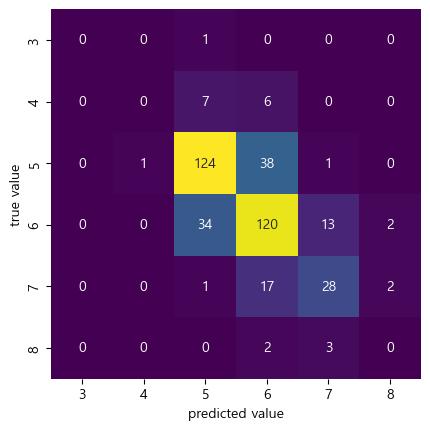

In [55]:
# make an instance XGBoost model
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=1)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mat = confusion_matrix(y_test, y_pred)

xticklabels = yticklabels = [3, 4, 5, 6, 7, 8]
sns.heatmap(
    mat,
    square=True,
    annot=True,
    cbar=False,
    xticklabels=xticklabels,
    yticklabels=yticklabels,
    fmt="d",
    cmap='viridis'
)
plt.xlabel("predicted value")
plt.ylabel("true value");

In [56]:
# accuracy per class
print("Accuracy per class")
for i in range(len(mat)):
    print(f"class {xticklabels[i]}: {mat[i,i] / mat[i].sum() * 100: >4.1f} %")

Accuracy per class
class 3:  0.0 %
class 4:  0.0 %
class 5: 75.6 %
class 6: 71.0 %
class 7: 58.3 %
class 8:  0.0 %


🚩 LogisticRegression 모델과 비교해 보면 class 7 에서 정확도 향상이 이루어졌다

In [57]:
accuracy = np.diag(mat).sum()/mat.sum() * 100
print(f"accuracy: {accuracy} %")

accuracy: 68.0 %


### Training XGBoost model with all data

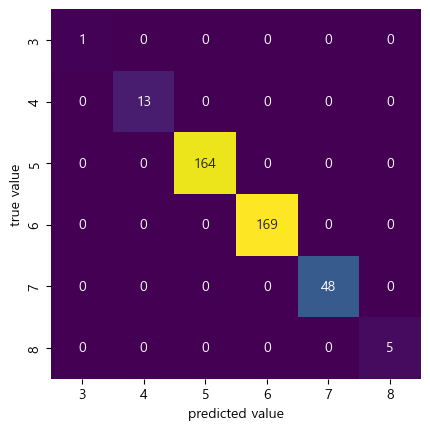

In [58]:
# make an instance XGBoost model
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=1)
xgb_model.fit(X, y)
y_pred = xgb_model.predict(X_test)

mat = confusion_matrix(y_test, y_pred)

xticklabels = yticklabels = [3, 4, 5, 6, 7, 8]
sns.heatmap(
    mat,
    square=True,
    annot=True,
    cbar=False,
    xticklabels=xticklabels,
    yticklabels=yticklabels,
    fmt="d",
    cmap='viridis'
)
plt.xlabel("predicted value")
plt.ylabel("true value");

🚩 테스트 데이터가 학습 데이터로 사용되면 테스트 결과는 100% 정확도를 보인다   
🚩 학습 데이터에 테스트 데이터를 포함하면 모델의 실제 예측성능이 과대포장될 수 있음   
🚩 학습의 목표는 처음보는 문제를 잘 푸는게 핵심. 예전에 풀었던 문제의 정답을 기억하는 건 별 의미가 없음.

## 성능향상을 위한 이상치(Outlier) 제거 방법
### 📌 Outlier detection with Local Outlier Factor (LOF) 알고리즘
출처 : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html

### Generate data with outliers

In [59]:
import numpy as np

np.random.seed(42)

X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

### Fit the model for outlier detection (default)

In [60]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

### Plot Outlier detection results

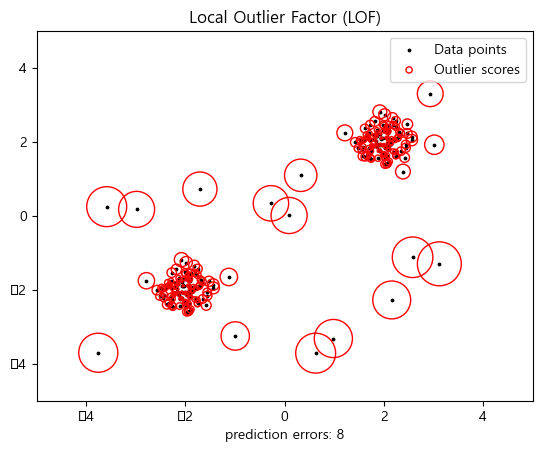

In [61]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection


def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])


plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
)
plt.title("Local Outlier Factor (LOF)")
plt.show()

### Eliminating Outlier with outlier score(radius)

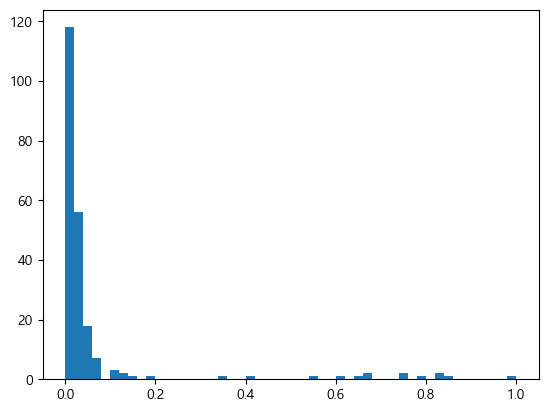

In [62]:
# plot histogram of radius
plt.hist(radius, bins=50);

In [64]:
# eliminate outliers from X where radius is equal or greater than 0.5
X_filtered = X[radius < 0.5]
X_filtered.shape

(208, 2)

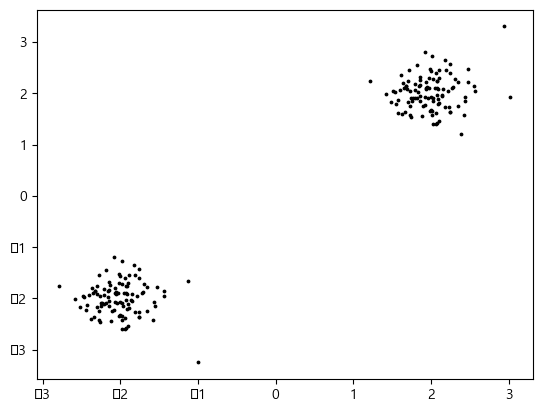

In [65]:
# plot X_filtered
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], color="k", s=3.0, label="Data points");
